# Crime Analytics: Visualization of Incident Reports

A- Overview

In this notebook, I analyze criminal incident data from Seattle and San Francisco to visualize patterns, contrast and compare patterns across the two cities.
This notebook is a visual narrative consisting of a series of visualizations with sufficient descriptive text to make a convincing argument.

B- Project Ideas
- For either city, how do incidents vary by time of day? Which incidents are most common in the evening? During what periods of the day are robberies most common?
- For either city, how do incidents vary by neighborhood? Which incidents are most common in the city center? In what areas or neighborhoods are robberies or thefts most common?
- For either city, how do incidents vary month to month in the Summer 2014 dataset?
- For either city, which incident types tend to correlate with each other on a day-by-day basis?
- (Advanced) What can we infer broadly about the differences in crime patterns between Seattle and San Francisco? Does one city tend to have more crime than the other, per capita? Do the relative frequencies of types of incidents change materially between the two cities? (NOTE: The two datasets do not have the same schema, so comparisons will require some work and some assumptions.)
- (Advanced) For either city, do certain crimes correlate with environmental factors such as temperature? (To answer this kind of question, I use external data sources )

C- Data

This project uses the real crime data from Summer 2014 of the two US cities: Seattle and San Francisco.

These datasets do NOT agree on schema, and they do NOT agree on categories or descriptions for specific crimes.
To draw comparisons and contrasts across cities, some assumptions about correspondences should be made. 
For example, LARCENY/THEFT is a category in San Francisco, but Seattle uses codes of the form THEFT-CARPROWL or THEFT-BUILDING. I need to make some reasonable assumptions to compare these data, and explain and justify these assumptions.
Scale. 

The data is a subsets of all three datasets during the period Summer 2014. 

D- Tools

Python with Bokeh and matplotlib

In [149]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline



# Load data
Will focus on the SF summer 2014 data first and expand to the Seattle data later.

In [150]:
# C:/Users/mkhelghati/Documents/coursera/rep_assg_6/sanfrancisco_incidents_summer_2014.csv
sf_summer_data      = pd.read_csv("sanfrancisco_incidents_summer_2014.csv", low_memory=False)

# Explore the data

In [151]:
sf_summer_data.head(5)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000


In [152]:
# number of unique category names in the data
sf_summer_data['Category'].unique()

array(['ARSON', 'NON-CRIMINAL', 'LARCENY/THEFT', 'DRUG/NARCOTIC',
       'DRIVING UNDER THE INFLUENCE', 'OTHER OFFENSES', 'TRESPASS',
       'VEHICLE THEFT', 'ASSAULT', 'FRAUD', 'SUSPICIOUS OCC',
       'SECONDARY CODES', 'WEAPON LAWS', 'MISSING PERSON', 'WARRANTS',
       'ROBBERY', 'DRUNKENNESS', 'PROSTITUTION', 'LIQUOR LAWS',
       'KIDNAPPING', 'FAMILY OFFENSES', 'LOITERING', 'DISORDERLY CONDUCT',
       'FORGERY/COUNTERFEITING', 'EMBEZZLEMENT', 'BURGLARY', 'SUICIDE',
       'VANDALISM', 'STOLEN PROPERTY', 'RUNAWAY', 'GAMBLING', 'EXTORTION',
       'PORNOGRAPHY/OBSCENE MAT', 'BRIBERY'], dtype=object)

In [153]:
# remove the unnecessary columns
sf_summer_data = sf_summer_data.drop(['IncidntNum','PdId'], axis=1)
# modify names of columns for better readibility 
sf_summer_data.columns = ['Category', 'Description', 'DayOfWeek', 'Date', 'Time', 'PdDistrict',
       'Resolution', 'Address', 'Longitude', 'Latitude', 'Location']
sf_summer_data.head(2)

,Category,Description,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,Longitude,Latitude,Location
0,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)"
1,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)"


# Questions:

Question1: 
For this city, how do incidents vary by time of day? Which incidents are most common in the evening? During what periods of the day are robberies most common?


In [154]:

# Creaete a column for hour of the day - removing the minutes
sf_summer_data['Hour'] = sf_summer['Time'].apply(lambda x: int(x[:2]) )

In [155]:
Total_by_hour = sf_summer_data.groupby(['Hour']).size()
# Replace NaN by 0
Total_by_hour = Total_by_hour.replace(np.NaN, 0. )

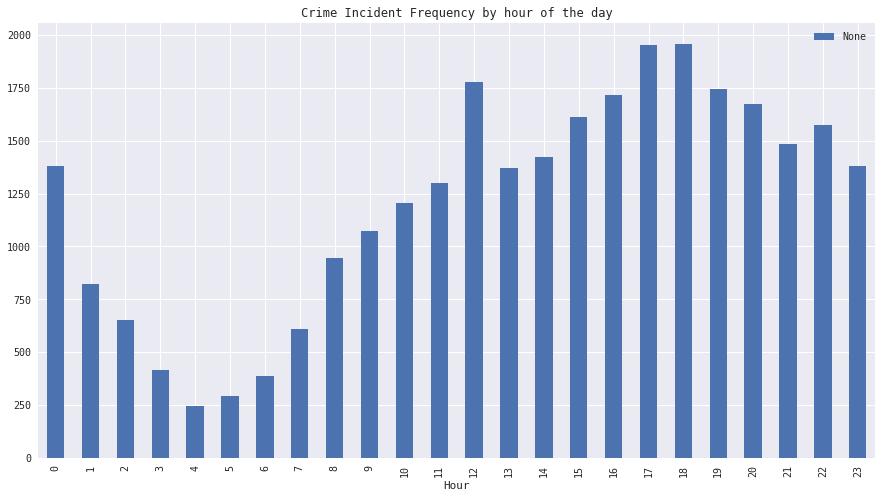

In [156]:
plt.figure(figsize= (15,8))
Total_by_hour.plot(kind= 'bar')
plt.xticks(range(24))
plt.legend()
plt.title('Crime Incident Frequency by hour of the day')

In [157]:
Category_by_hour = sf_summer_data.groupby(['Category', 'Hour']).size().unstack()
# Replace NaN by 0
Category_by_hour = Category_by_hour.replace(np.NaN, 0. )
#sort categories by the most number of incidents - introduce new column, names Total for this purpose
Category_by_hour['Total'] = sf_summer_data.groupby('Category').size()
Category_by_hour.sort_values(by= 'Total', inplace= True, ascending= False)
Top_Frequent_Categories = Category_by_hour['Total'].head(10).keys()

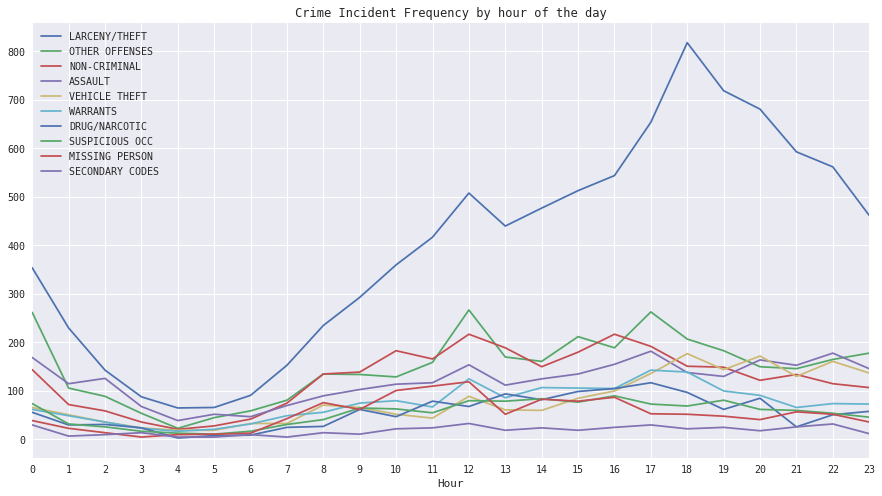

In [158]:
plt.figure(figsize= (15,8))
for category in Top_Frequent_Categories :
    Category_by_hour.drop('Total', axis=1).loc[category].plot(label= category)
plt.xticks(range(24))
plt.legend()
plt.title('Crime Incident Frequency by hour of the day')

# Answer for Question1 for San Francisco in summer 2014
Question1: For this city, how do incidents vary by time of day? Which incidents are most common in the evening? During what periods of the day are robberies most common?

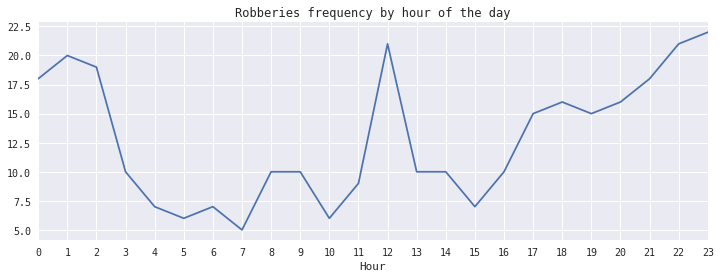

In [159]:
# To answer part 3 of the question, During what periods of the day are robberies most common?
Category_by_hour.drop('Total', axis=1).loc['ROBBERY'].plot(figsize= (12,4))
plt.xticks(range(24))
plt.title('Robberies frequency by hour of the day')

# Question 2 :
- For either city, how do incidents vary by neighborhood? 
- Which incidents are most common in the city center? 
- In what areas or neighborhoods are robberies or thefts most common?

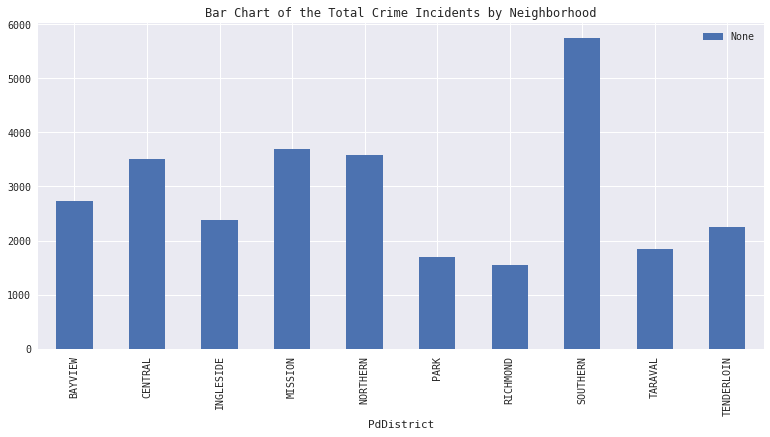

In [160]:
# We plot the number of incidetns per each value in PdDistrict
# This is the answer to part one of the question
plt.figure(figsize= (13,6))
Total_by_district = sf_summer_data.groupby(['PdDistrict']).size()
Total_by_district.plot(kind= 'bar')
plt.legend()
plt.title('Bar Chart of the Total Crime Incidents by Neighborhood')

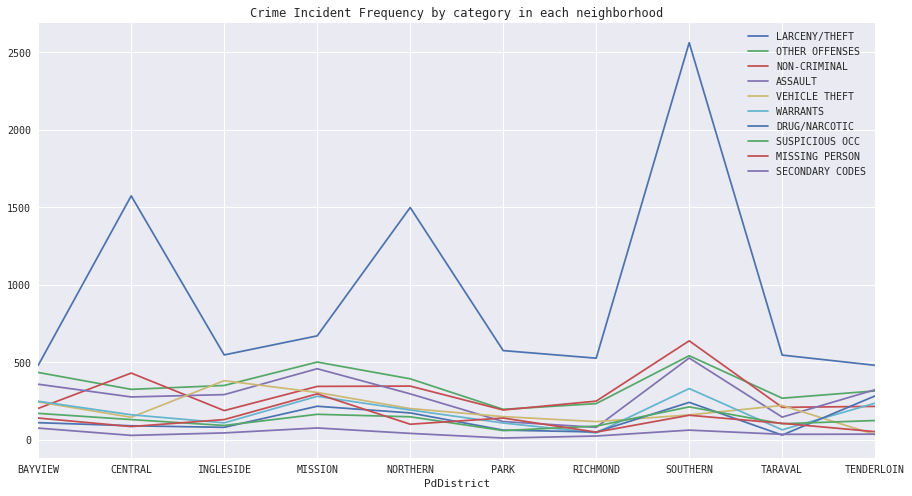

In [161]:
# We can also look at changing behavoiur of the frequency by category in each neighborhood 
Category_by_district = sf_summer_data.groupby(['Category', 'PdDistrict']).size()
# Replace NaN by 0
Category_by_district = Category_by_district.replace(np.NaN, 0. )
plt.figure(figsize= (15,8))
for category in Top_Frequent_Categories :
    Category_by_district.loc[category].plot(label= category)
plt.legend()
plt.title('Crime Incident Frequency by category in each neighborhood')

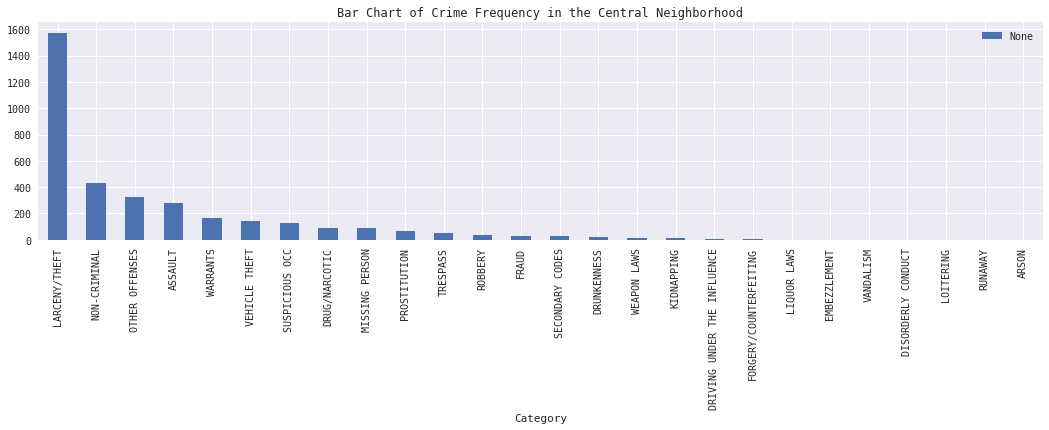

In [162]:
# Here, we answer the second part of the question 2, the categories with the most incidents in CENTRAL disctirct:
Central_disctrict_data = sf_summer_data[sf_summer_data['PdDistrict'] == 'CENTRAL']
Category_by_central = Central_disctrict_data.groupby(['Category']).size()
# Replace NaN by 0
Category_by_central = Category_by_central.replace(np.NaN, 0.)
Category_by_central.sort_values(inplace= True, ascending= False)
#Category_by_central
plt.figure(figsize= (18,4))
Category_by_central.plot(kind= 'bar')
plt.legend()
plt.title('Bar Chart of Crime Frequency in the Central Neighborhood')

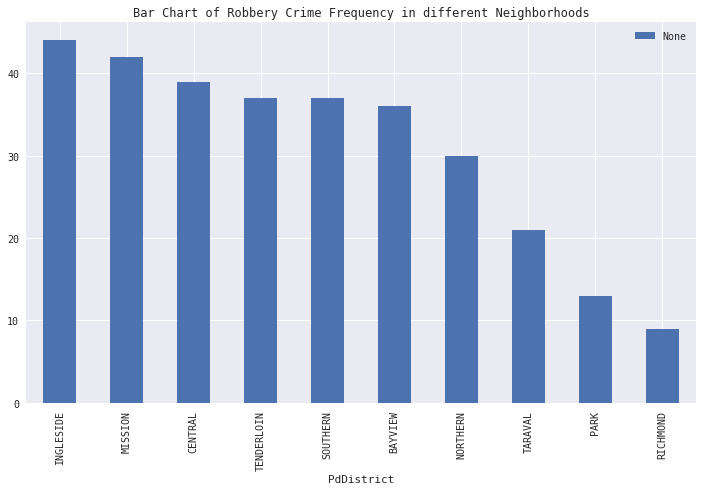

In [163]:
Robberies_district_data = sf_summer_data[sf_summer_data['Category'] == 'ROBBERY']
Robbery_by_disctict = Robberies_district_data.groupby(['PdDistrict']).size()
# Replace NaN by 0
Robbery_by_disctict = Robbery_by_disctict.replace(np.NaN, 0.)
Robbery_by_disctict.sort_values(inplace= True, ascending= False)
#Category_by_central
plt.figure(figsize= (12,7))
Robbery_by_disctict.plot(kind= 'bar')
plt.legend()
plt.title('Bar Chart of Robbery Crime Frequency in different Neighborhoods')

# Answer for Question 2 for San Francisco in summer 2014
For either city, how do incidents vary by neighborhood? 
Which incidents are most common in the city center? 
In what areas or neighborhoods are robberies or thefts most common?